In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()
#It is giving you Statistical inferance of your data set

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Engineering

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# if you observe we have 2 non numerical columns
# you can see that for your sex parameter it has devided into 2 numerical parameters,Here we are dropping one parameter 
Male=pd.get_dummies(df["sex"], drop_first = True)
df=pd.concat([df,Male],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


Similarly we arer doing for smokers

In [8]:
Smoker=pd.get_dummies(df["smoker"], drop_first = True)
df=pd.concat([df,Smoker],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [9]:
df = df.rename(columns = {"yes":"Smoker"})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [10]:
df['region'].unique()
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [11]:
Region=pd.get_dummies(df["region"], drop_first = True)
df=pd.concat([df,Region],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


## Exploratory Analysis

In [12]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

## Distribution of sex parameter

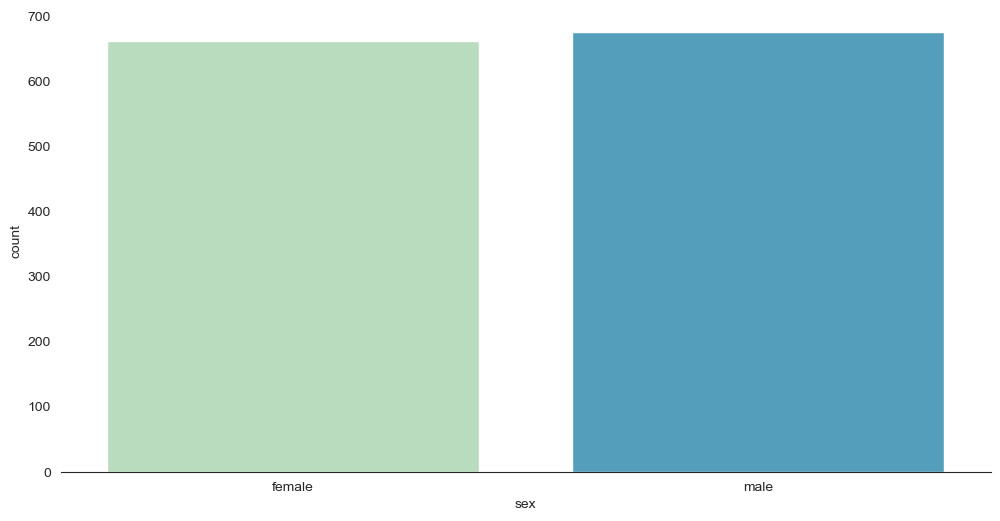

In [13]:
plt.figure(figsize=(12,6)) #12 is width and 6 is height
sns.set_style("white")
sns.countplot(x="sex",data=df,palette="GnBu")
# countplot, you pass a parameter and it checks the parameter distribution based on the different values that you have
sns.despine(left=True) #Boundaries removed

## Relationship of Smoking and Gender With Respect to Charges

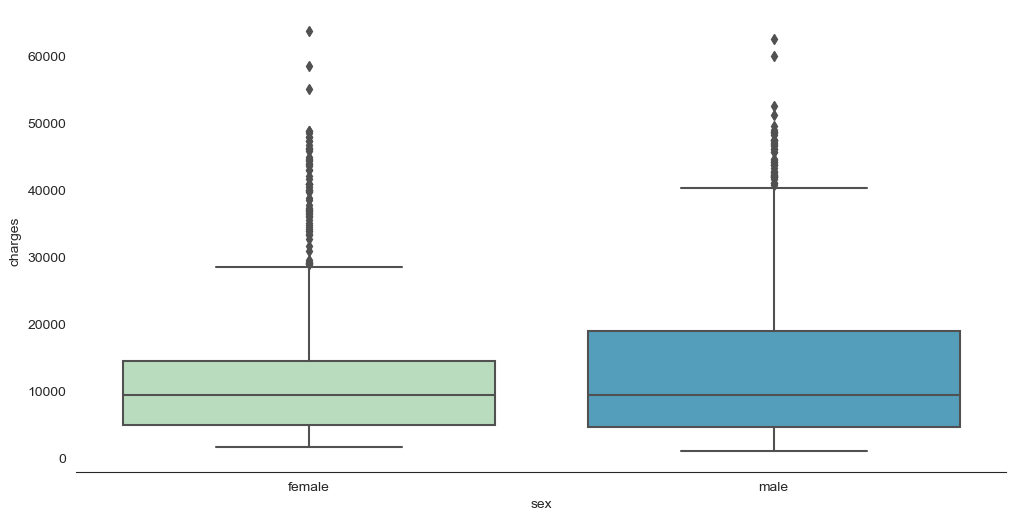

In [14]:
plt.figure(figsize=(12,6)) #12 is width and 6 is height
sns.set_style("white")
sns.boxplot(x="sex",y="charges",data=df,palette="GnBu")
# countplot, you pass a parameter and it checks the parameter distribution based on the different values that you have
sns.despine(left=True) #Boundaries removed

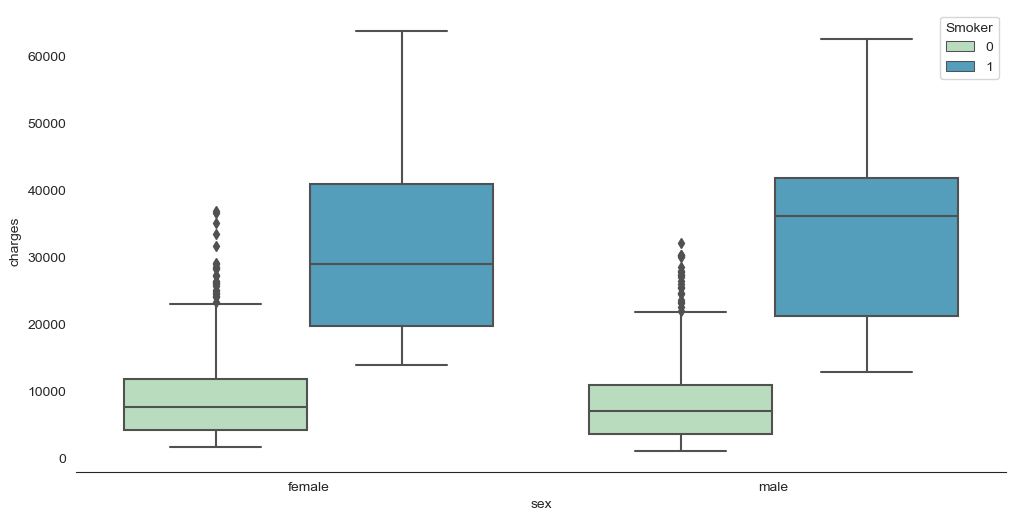

In [15]:
plt.figure(figsize=(12,6)) #12 is width and 6 is height
sns.set_style("white")
sns.boxplot(x="sex",y="charges",data=df,palette="GnBu",hue="Smoker")
# countplot, you pass a parameter and it checks the parameter distribution based on the different values that you have
sns.despine(left=True) #Boundaries removed

<Axes: xlabel='age', ylabel='charges'>

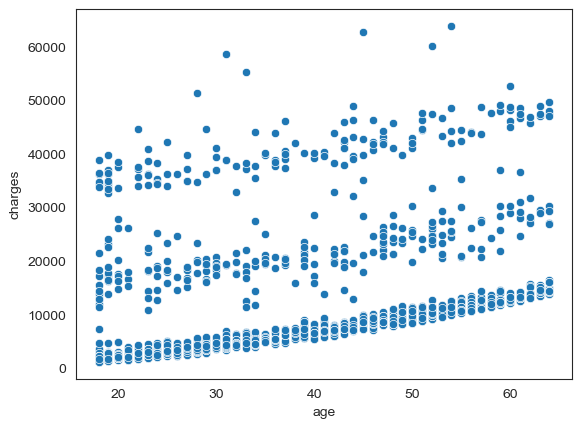

In [16]:
sns.scatterplot(x="age",y="charges",data=df)
# AS you can see there is linear increase in charge as you grow older 

<Axes: xlabel='age', ylabel='charges'>

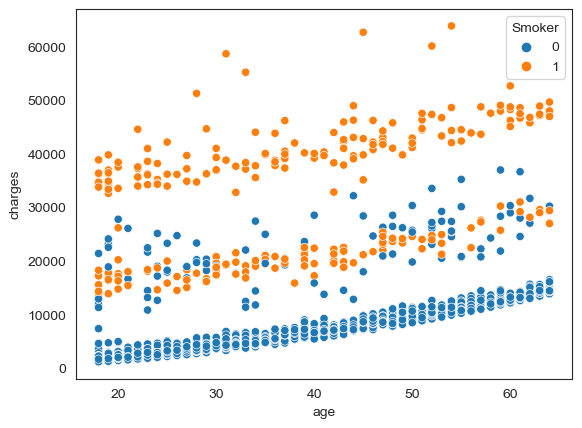

In [17]:
# To show the varistion in the above graph (vertically)
sns.scatterplot(x="age",y="charges",data=df,hue="Smoker")

## Influence of BMI

<Axes: xlabel='bmi', ylabel='charges'>

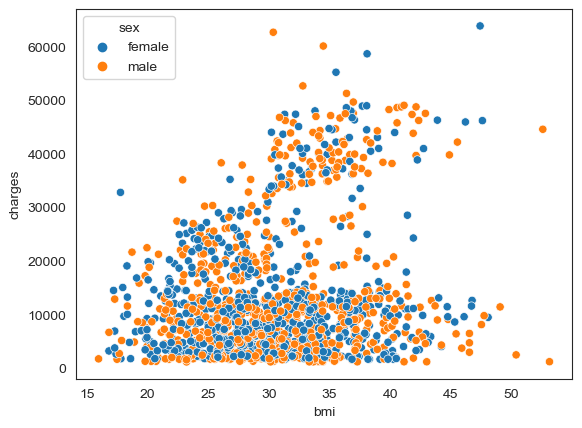

In [18]:
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex")

<Axes: xlabel='bmi', ylabel='charges'>

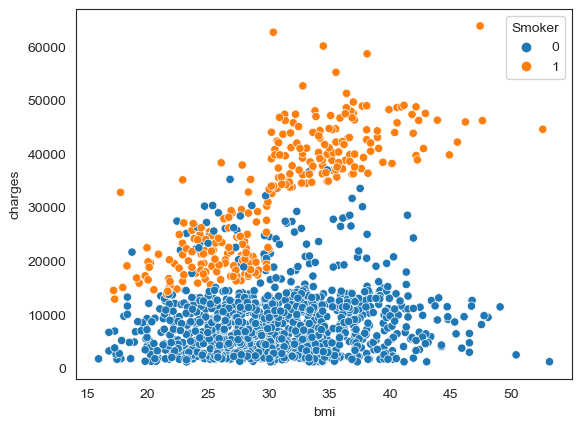

In [19]:
# BMI and smoking 
sns.scatterplot(x="bmi",y="charges",data=df,hue="Smoker")

<Axes: xlabel='bmi', ylabel='charges'>

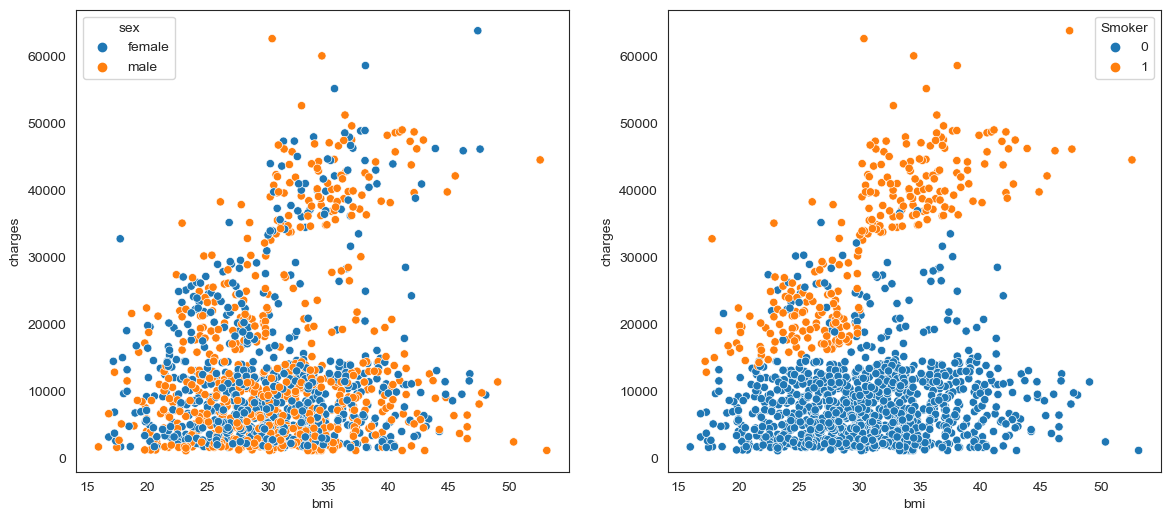

In [20]:
# Combing both the graph
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex",ax=ax[0])
sns.scatterplot(x="bmi",y="charges",data=df,hue="Smoker",ax=ax[1])

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [22]:
df.drop(["sex","smoker","region"],axis=1,inplace=True)
# no need of df=df. because we are using inplace

<Axes: >

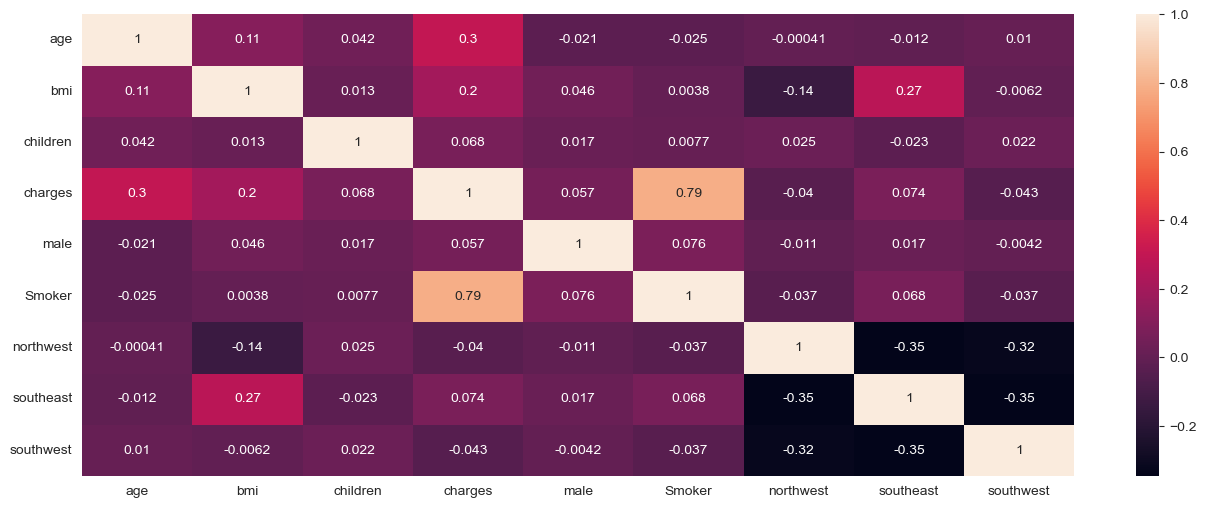

In [23]:
# Corelation Matrix
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.corr()
# This is the co-relation matrix

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


## Splitting the data

In [25]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
# breaking up into 60 40

In [27]:
x_train.shape

(802, 8)

In [28]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Scaling the data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
scaled_x_train=scaler.fit_transform(x_train)
# fit will learn each of the parameter, it will take age mean and variance of standard deviation 
# mean of age - standard deviation of age
scaled_x_test=scaler.fit_transform(x_test)

## Support Vector Regression Model

In [31]:
from sklearn.svm import SVR

regressor=SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [32]:
predict=regressor.predict(scaled_x_test)

In [33]:
predict.shape

(536,)

In [34]:
y_test.shape

(536,)

In [35]:
predict[:10]

array([9525.07412198, 9526.39236025, 9529.89599357, 9507.86083475,
       9566.87836678, 9542.93578525, 9568.26766305, 9529.27359088,
       9550.68875602, 9552.20254812])

In [36]:
y_test[:10]

596      7640.30920
383      5846.91760
1010     8269.04400
8        6406.41070
343     13981.85035
970     10702.64240
158     36950.25670
179      8538.28845
75      11356.66090
624     12129.61415
Name: charges, dtype: float64

In [37]:
np.mean((y_test - predict)**2)

148314007.5161515